# Lab | Feature extraction

For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [9]:
# load the final dataset from lab-leaning numerical data

customer_df = pd.read_csv('customer_df.csv') 
customer_df.head()

,Unnamed: 0,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,0,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,1,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,2,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,3,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,4,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [12]:
# checking the dataset to be sure that I am working on correct file.

customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Unnamed: 0                     9134 non-null   int64         
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location_code                  9134 non-null   object        
 11  marital_status   

In [11]:
#It seems that the time variable was saved as object and not date so I'm doing the conversion again
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'], infer_datetime_format=True)

## 1. Open the categoricals variable we created before.

``` python
categoricals = data.select_dtypes(np.object)
categoricals.head()
```


In [13]:
categoricals = customer_df.select_dtypes(np.object)
categoricals.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


## 2. Plot all the categorical variables with the proper plot. What can you see?

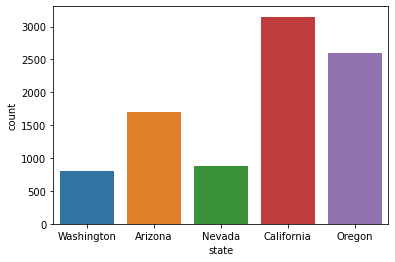

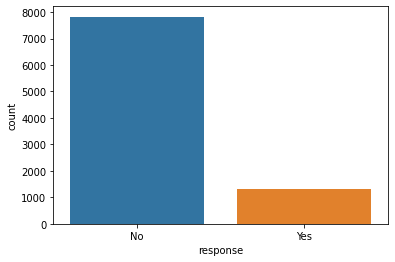

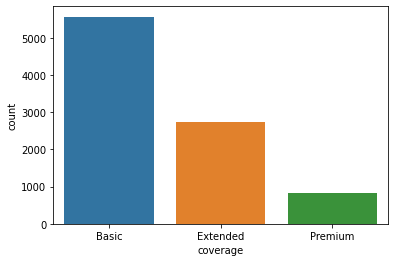

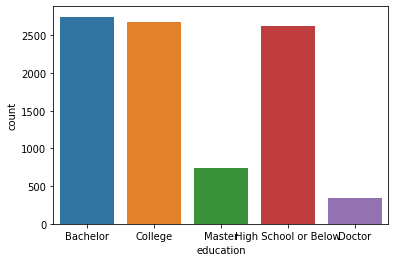

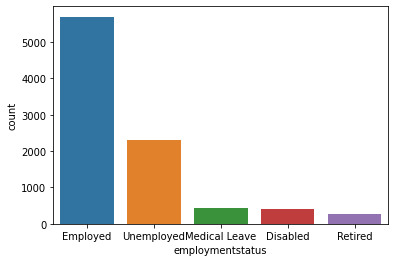

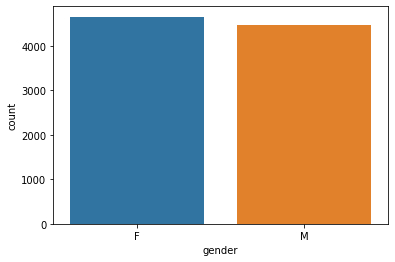

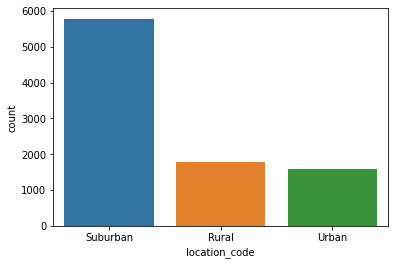

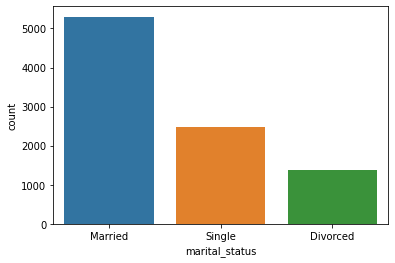

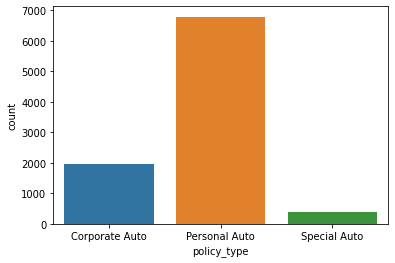

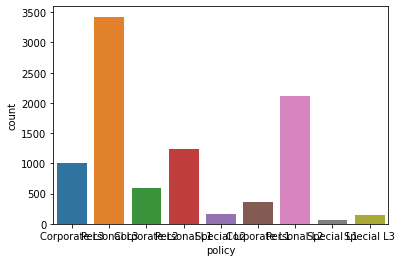

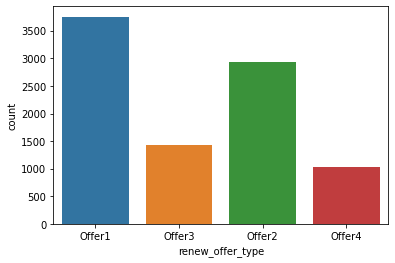

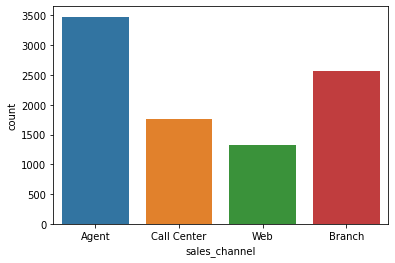

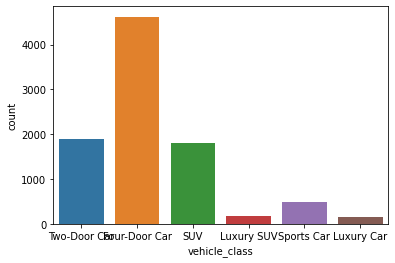

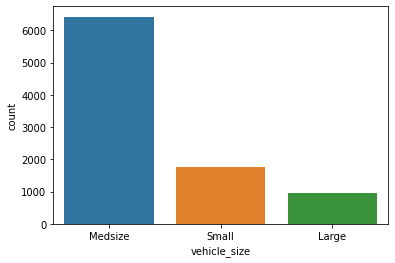

In [34]:
for col in categoricals:
    sns.countplot(categoricals[col])
    plt.show()

In [ ]:
# plotting different variables together 

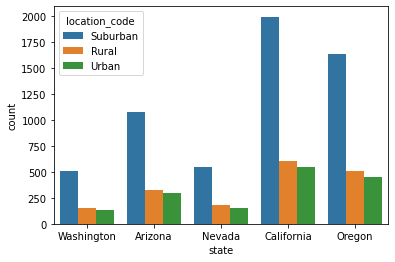

In [23]:
plt.figure(figsize=(6,4))
sns.countplot(data=categoricals, x="state", hue="location_code")
plt.show()

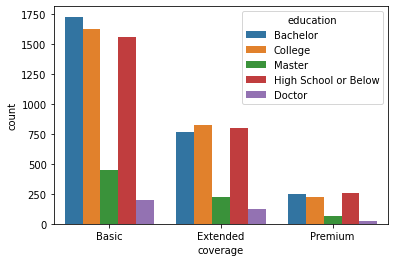

In [35]:
plt.figure(figsize=(6,4))
sns.countplot(data=categoricals, x ="coverage", hue="education")
plt.show()

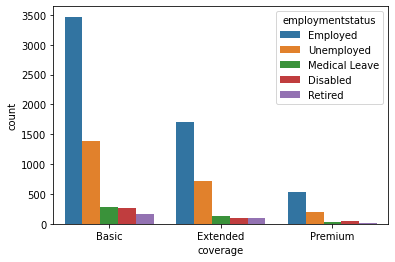

In [34]:
plt.figure(figsize=(6,4))
sns.countplot(data=categoricals, x ="coverage", hue="employmentstatus")
plt.show()

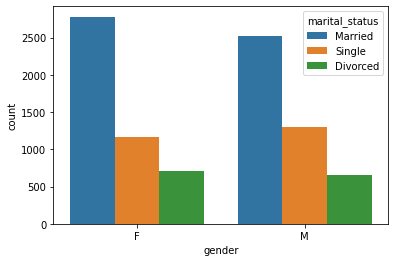

In [43]:
plt.figure(figsize=(6,4))
sns.countplot(data=categoricals, x ="gender", hue="marital_status")
plt.show()

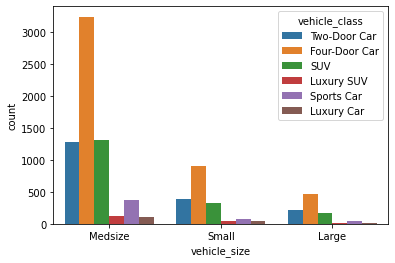

In [52]:
plt.figure(figsize=(6,4))
sns.countplot(data=categoricals, x ="vehicle_size",hue="vehicle_class")
plt.show()

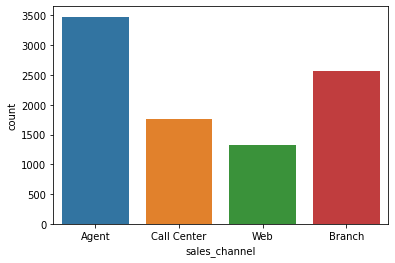

In [53]:
plt.figure(figsize=(6,4))
sns.countplot(data=categoricals, x ="sales_channel")
plt.show()

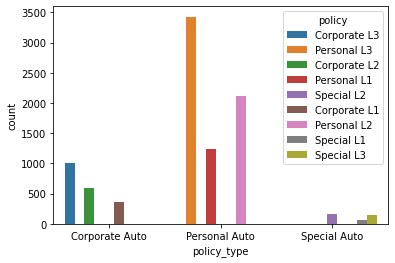

In [54]:
plt.figure(figsize=(6,4))
sns.countplot(data=categoricals, x ="policy_type", hue="policy")
plt.show()

### for future reference
def create_bar_chart(df, cols= []):
    for col in cols:
        plt.bar(df[col])
        plt.show()


## 3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

I am not sure to understand the question here. Are we still talking about categorical variables?
Also, cand we decide what to do with a column (i.e. drop it) without knowing what we want to do with the datas?

## 4. Plot time variable. Can you extract something from it?

In [ ]:
# plot it with numerical variable such as nb of open complaints 

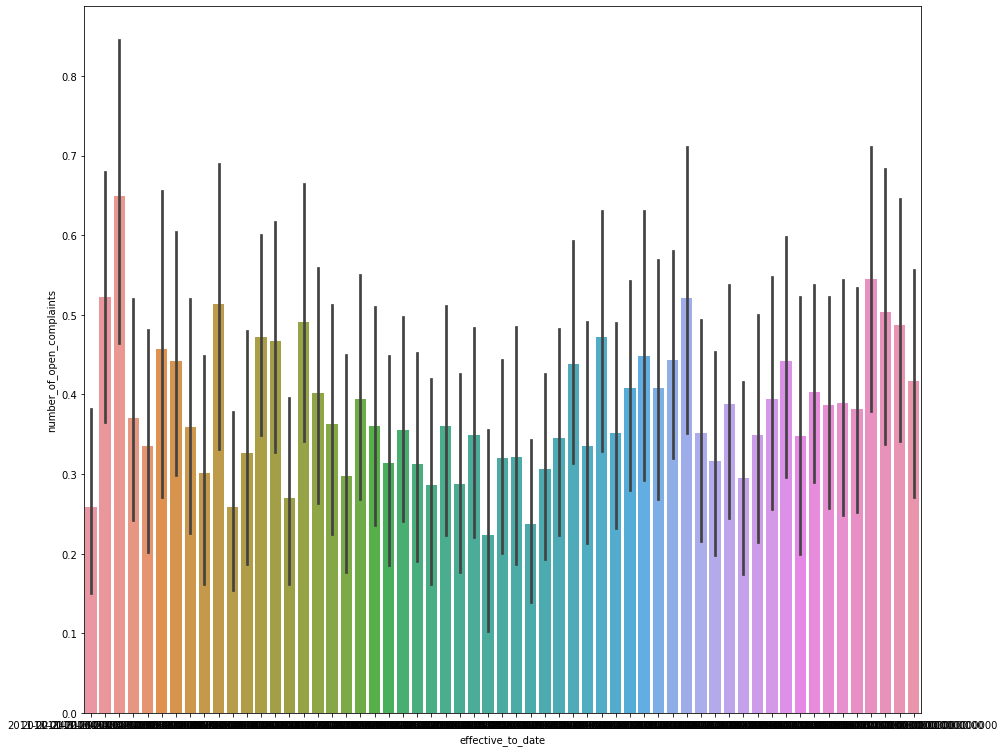

In [28]:
plt.figure(figsize=(15,13))
sns.barplot(data=customer_df, x ="effective_to_date", y= "number_of_open_complaints")
plt.show()


In [ ]:
# extract the year and the month of the time value to group the datas to have better vizualization

In [22]:
customer_df['MonthYear_value'] = customer_df['effective_to_date'].dt.to_period('M')
customer_df['MonthYear_value']

0       2011-02
1       2011-01
2       2011-02
3       2011-01
4       2011-02
         ...   
9129    2011-02
9130    2011-02
9131    2011-02
9132    2011-02
9133    2011-02
Name: MonthYear_value, Length: 9134, dtype: period[M]

In [33]:
customer_df['MonthYear_value'].value_counts()

2011-01    4898
2011-02    4236
Freq: M, Name: MonthYear_value, dtype: int64

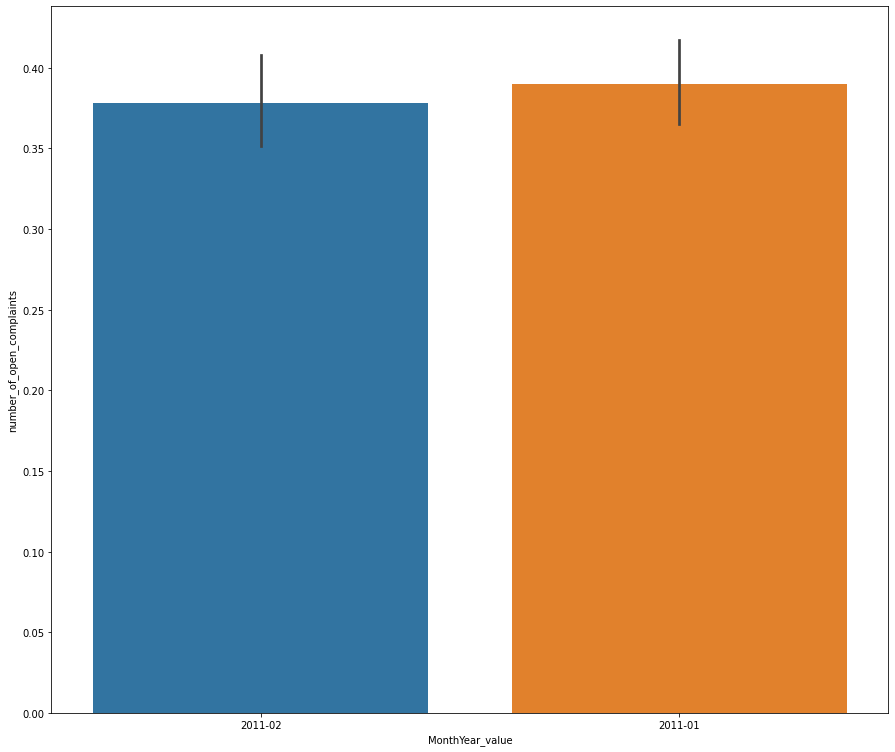

In [29]:
plt.figure(figsize=(15,13))
sns.barplot(data=customer_df, x ="MonthYear_value", y= "number_of_open_complaints")
plt.show()


In [ ]:
# extract the weekdays to see if there is a pattern based on the days of the week